# Data Science for Social Justice Workshop: Module 4

## Language Biases and Word Embeddings

Language carries **implicit biases**, functioning both as a reflection and a perpetuation of stereotypes that people carry with them. Using natural language processing tools, we can trace these biases in the many language datasets to be found online.

One way to discover language biases is via word embeddings. In order to do so, we first need to postulate concepts for terms along which we might expect biases to exist. For example, humans often associate words with masculinity or femininity, which reflects both a normative construction of a gender binary, as well as stereotypes *within* that binary. Word embeddings provide us word vectors for many terms, including "male" and "female", as well as other words that may be more strongly associated with the concepts of "male" and "female", as reflected in language use. We can attempt to quantify this directly using notions of distance with word embeddings.

Specifically, we develop **target concepts** for the terms we aim to identify biases along (e.g., "male" and "female"). Then, we can then compute relative similarities of other word vectors – particularly, words that act as evaluative attributes such as "strong" and "sensitive". These words can be categorised through clustering algorithms and labeled through a semantic analysis system into more general (conceptual) biases, yielding a broad picture of the biases present in a discourse community.

This notebook is based off a paper examining language biases in Reddit: see [here](https://xfold.github.io/WE-GenderBiasVisualisationWeb/) for a web demo
and [here](https://github.com/xfold/LanguageBiasesInReddit) for the full repo.

In [9]:
#Uncomment and run these lines if you are using Datahub or Binder,
# or if you need to install any of the following packages
#!pip install gensim
#!pip install inflect

In [10]:
import gensim 
import os
from gensim.models import Word2Vec

In [11]:
# Change directory
# We include two ../ because we want to go two levels up in the file structure
os.chdir("../../data")

FileNotFoundError: [Errno 2] No such file or directory: '../../data'

Let's get the Word Embeddings model we made in the previous notebook.

In [12]:
model = Word2Vec.load('aita.emb')

## Obtaining Biased Words Relative to Target Concepts

We now run our method of finding biased words towards our target sets. We will be using functions in an external file - `utils.py` - which you are free to look through if you're interested. Otherwise, feel free to use the functions as desired.

Given a vocabulary and two sets of target words (such as, in this case, those for *women* and *men*), we rank the words from least to most biased. As such, we obtain two ordered lists of the most biased words towards each target set, obtaining an overall view of the bias distribution in that particular community with respect to those two target sets. 

Here's what happening in the next block of code:
- We *calculate the centroid* of a target set by averaging the embedding vectors in our target set (e.g. the vectors for `he, son, his, him, father, male` for our target concept `male`);
- We calculate the *cosine similarity* between the vectors for all words in our vocabulary as compared to our two centroids (we also apply POS-filtering to only work with parts of speech we expect to be relevant);
- We use a *threshold* based on standard deviation to determine how severe a bias needs to be before we include it;
- We *rank the words* in the vocabulary of our word embeddings model based on their bias towards either target concept.

Thus, the implicit hypothesis here is that word vectors much closer to the centroid of one target concept than the other are used more similarly with respect to that concept. This, in effect, is an effort to quantify the bias of words used in general discourse within a community.

In [13]:
# Import function to calculate biased words
from utils import calculate_biased_words

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/emilygrabowski/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/emilygrabowski/nltk_data...


Here are our target concept vectors. This is a critical choice: the centroid of these represents the concept at hand. What happens if you change the words included?

In [26]:
target1 = ["sister" , "female" , "woman" , "girl" , "daughter" , "she" , "hers" , "her"]
target2 = ["brother" , "male" , "man" , "boy" , "son" , "he" , "his" , "him"] 

In [27]:
[b1, b2] = calculate_biased_words(model, target1, target2, 4)

Let's print some biases. Here you see the most-biased words towards our target concepts (1 being *women*, 2 being *men*).

In [18]:
print('Biased words towards target set 1')
print([word for word in b1.keys()])

Biased words towards target set 1
['friend', 'person', 'group', 'personal', 'enjoy', 'unfair', 'context', 'lady', 'harsh', 'makeup', 'permission', 'discuss', 'chat', 'writing', 'sensitive', 'professional', 'talks', 'introduced', 'sexual', 'tight', 'stepsister', 'aunts', 'sara', 'yoga', 'confided', 'shamed', 'acne', 'rub', 'cm']


In [19]:
print('Biased words towards target set 2')
print([word for word in b2.keys()] )

Biased words towards target set 2
['second', 'helping', 'bill', 'list', 'service', 'broken', 'claims', 'grandfather', 'doubt', 'tom', 'salary', 'furniture', 'deserved', 'bullied', 'land', 'demands', 'ability', 'figures', 'xbox', 'returning', 'beat', 'horse', 'sum', 'pen', 'kai']


## Visualizing Biases using $t$-SNE

We now return to our dimensionality reduction technique, $t$-SNE, to try and visualize these biased words in a 2-dimensional space.

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.manifold import TSNE
%matplotlib inline

In [21]:
tsne = TSNE(
    perplexity=40,
    n_components=2,
    init='pca',
    n_iter=5000,
    random_state=23,
    learning_rate='auto')
X_tsne = tsne.fit_transform(model.wv.vectors)

/Users/emilygrabowski/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


In [22]:
#convert biased term keys to arrays
target1_idx = np.array([model.wv.key_to_index[key] for key in b1.keys()])
target2_idx = np.array([model.wv.key_to_index[key] for key in b2.keys()])

In [23]:
#find t-sne values for the biased sets
X_target1 = X_tsne[target1_idx]
X_target2 = X_tsne[target2_idx]

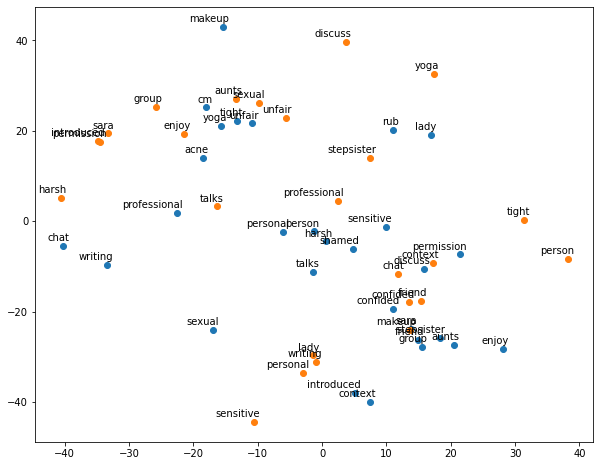

In [25]:
#plot tsne values for each biased set
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

ax.scatter(X_target1[:, 0], X_target1[:, 1], color='C0')
ax.scatter(X_target2[:, 0], X_target2[:, 1], color='C1')

for idx, point in enumerate(X_target1):
    ax.annotate(
        model.wv.index_to_key[target1_idx[idx]],
        xy=(point[0], point[1]),
        xytext=(6, 3),
        textcoords='offset points',
        ha='right',
        va='bottom')
    
for idx, point in enumerate(X_target2):
    ax.annotate(
        model.wv.index_to_key[target1_idx[idx]],
        xy=(point[0], point[1]),
        xytext=(6, 3),
        textcoords='offset points',
        ha='right',
        va='bottom')

## Existing Target Sets

Here are some other target sets that have been previously used in the literature:

* *Gender target sets taken from Nosek, Banaji, and Greenwald 2002.*
    - Female: `sister, female, woman, girl, daughter, she, hers, her`.
    - Male: `brother, male, man, boy, son, he, his, him`.
* *Religion target sets taken from Garg et al. 2018.*
    - Islam: `allah, ramadan, turban, emir, salaam, sunni, koran, imam, sultan, prophet, veil, ayatollah, shiite, mosque, islam, sheik, muslim, muhammad`.
    - Christianity: `baptism, messiah, catholicism, resurrection, christianity, salva-tion, protestant, gospel, trinity, jesus, christ, christian, cross,catholic, church`.
* *Racial target sets taken from Garg et al. 2017*
    - White last names: `harris, nelson, robinson, thompson, moore, wright, anderson, clark, jackson, taylor, scott, davis, allen, adams, lewis, williams, jones, wilson, martin, johnson`.
    - Hispanic last names: `ruiz, alvarez, vargas, castillo, gomez, soto,gonzalez, sanchez, rivera, mendoza, martinez, torres, ro-driguez, perez, lopez, medina, diaz, garcia, castro, cruz`.
    - Asian last names: `cho, wong, tang, huang, chu, chung, ng,wu, liu, chen, lin, yang, kim, chang, shah, wang, li, khan,singh, hong`.
    - Russian last names: `gurin, minsky, sokolov, markov, maslow, novikoff, mishkin, smirnov, orloff, ivanov, sokoloff, davidoff, savin, romanoff, babinski, sorokin, levin, pavlov, rodin, agin`.
* *Career/family target sets taken from Garg et al. 2018.*
    - Career: `executive, management, professional, corporation, salary, office, business, career`.
    - Family: `home, parents, children, family, cousins, marriage, wedding, relatives.Math: math, algebra, geometry, calculus, equations, computation, numbers, addition`.
* *Arts/Science target sets taken from Garg et al. 2018.*
    - Arts: `poetry, art, sculpture, dance, literature, novel, symphony, drama`.
    - Science: `science, technology, physics, chemistry, Einstein, NASA, experiment, astronomy`.

### Sources

Nosek, B. A., Banaji, M. R., & Greenwald, A. G. (2002). Harvesting implicit group attitudes and beliefs from a demonstration web site. Group Dynamics, 6(1), 101–115. https://doi.org/10.1037/1089-2699.6.1.101

Garg, N., Schiebinger, L., Jurafsky, D., & Zou, J. (2017). Word Embeddings Quantify 100 Years of Gender and Ethnic Stereotypes, 1–33.